1. Load the dataset into python environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


2. Make ‘PassengerId’ as the index column

In [3]:
pd.read_table('/content/titanic_dataset.csv',sep=',')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data=pd.read_csv('/content/titanic_dataset.csv',index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 11)

3.Check the basic details of the dataset

In [6]:
data.info

<bound method DataFrame.info of              Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
1                   0       3  ...   NaN        S
2                   1       1  ...   C85        C
3                   1       3  ...   NaN        S
4                   1       1  ...  C123        S
5                   0       3  ...   NaN        S
...               ...     ...  ...   ...      ...
887                 0       2  ...   NaN        S
888                 1       1  ...   B42        S
889                 0       3  ...   NaN        S
890                 1       1  ...  C148        C
891                 0       3  ...   NaN        Q

[891 rows x 11 columns]>

4.Fill in all the missing values present in all the columns in the dataset

In [7]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
data2=data.fillna(value=0)
data2


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S


5.Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Pclass')

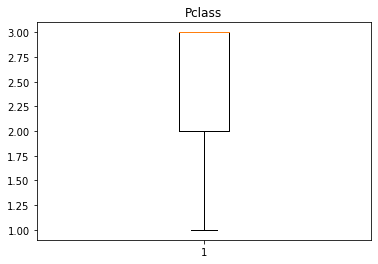

In [14]:
plt.boxplot(data2['Pclass'])
plt.title('Pclass')

#No outlayer in pclass

Text(0.5, 1.0, 'Age')

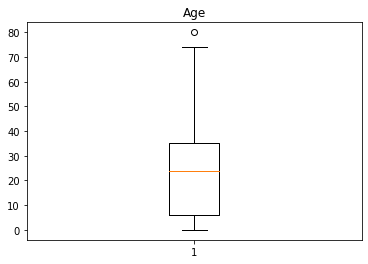

In [15]:
plt.boxplot(data2['Age'])
plt.title('Age')

#No outlayer in Age

Text(0.5, 1.0, 'Fare')

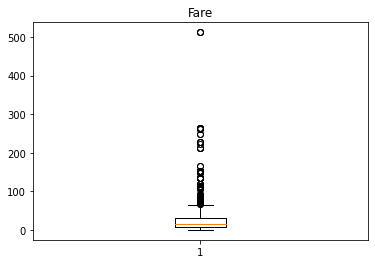

In [16]:
plt.boxplot(data2['Fare'])
plt.title('Fare')

In [29]:
Q1=np.percentile(data2['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data2['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data2['Fare'],75,interpolation='midpoint')

In [30]:
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [31]:
IQR=Q3-Q1

In [32]:
low_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR

In [33]:
print(low_lim)
print(Up_lim)

-26.724
65.6344


In [34]:
outlier=[]
for x in data2['Fare']:
  if((x>Up_lim) or (x<low_lim)):
    outlier.append(x)

In [35]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [44]:
ind1=data2['Fare']>Up_lim
data2.loc[ind1].index

Int64Index([119, 121, 125, 140, 152, 160, 181, 196, 202, 216, 219, 225, 231,
            246, 257, 258, 259, 263, 269, 270, 276, 291, 292, 298, 300, 306,
            307, 308, 311, 312, 319, 320, 325, 326, 333, 335, 337, 338, 342,
            367, 370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 439, 446,
            454, 485, 487, 497, 499, 505, 506, 521, 528, 538, 541, 545, 551,
            558, 559, 582, 586, 588, 592, 610, 628, 642, 646, 656, 660, 661,
            666, 680, 682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 746,
            760, 764, 766, 780, 790],
           dtype='int64', name='PassengerId')

In [45]:
data2.drop([119, 121, 125, 140, 152, 160, 181, 196, 202, 216, 219, 225, 231,
            246, 257, 258, 259, 263, 269, 270, 276, 291, 292, 298, 300, 306,
            307, 308, 311, 312, 319, 320, 325, 326, 333, 335, 337, 338, 342,
            367, 370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 439, 446,
            454, 485, 487, 497, 499, 505, 506, 521, 528, 538, 541, 545, 551,
            558, 559, 582, 586, 588, 592, 610, 628, 642, 646, 656, 660, 661,
            666, 680, 682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 746,
            760, 764, 766, 780, 790],inplace=True)

Text(0.5, 1.0, 'Fare')

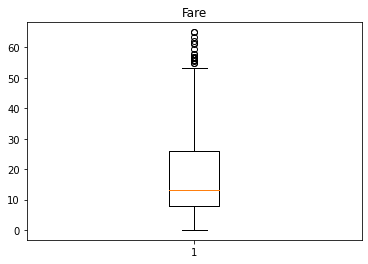

In [47]:
plt.boxplot(data2['Fare'])
plt.title('Fare')

6.Do min max scaling on the feature set (Take ‘Survived’ as target)


In [84]:
data2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,0,Q
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S


In [91]:
data2

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,0,S
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,0,S
6,0,3,male,0.0,0,0,330877,8.4583,0,Q
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,0,S
888,1,1,female,19.0,0,0,112053,30.0000,B42,S
889,0,3,female,0.0,1,2,W./C. 6607,23.4500,0,S


In [92]:
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,0,S
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,0,S
6,0,3,male,0.0,0,0,330877,8.4583,0,Q


In [95]:
data2.drop('Sex',axis=1,inplace=True)

In [96]:
data2.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,A/5 21171,7.2500,0,S
3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,S
4,1,1,35.0,1,0,113803,53.1000,C123,S
5,0,3,35.0,0,0,373450,8.0500,0,S
6,0,3,0.0,0,0,330877,8.4583,0,Q


In [98]:
data2.Ticket.nunique()

632

In [101]:
data2.drop('Ticket',axis=1,inplace=True)


In [102]:
data2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,S
3,1,3,26.0,0,0,7.9250,0,S
4,1,1,35.0,1,0,53.1000,C123,S
5,0,3,35.0,0,0,8.0500,0,S
6,0,3,0.0,0,0,8.4583,0,Q


In [103]:
data2.Embarked.nunique()

3

In [104]:
data2=pd.get_dummies(data2)

In [105]:
data2

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_0,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B30,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B42,Cabin_B50,Cabin_B51 B53 B55,Cabin_B71,Cabin_B94,Cabin_C101,Cabin_C103,Cabin_C104,Cabin_C106,Cabin_C110,...,Cabin_D21,Cabin_D28,Cabin_D30,Cabin_D35,Cabin_D45,Cabin_D46,Cabin_D47,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E36,Cabin_E38,Cabin_E44,Cabin_E46,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,3,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,3,0.0,0,0,8.4583,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
888,1,1,19.0,0,0,30.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
889,0,3,0.0,1,2,23.4500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [109]:
y=data2['Survived']
X=data2.drop(['Survived'],axis=1)

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [111]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [112]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 9.523629456189643e+16


In [113]:
from sklearn.metrics import r2_score
print('R squared value is:',r2_score(y_test,predictions) )

R squared value is: -4.212378871937401e+17


In [114]:
from sklearn import preprocessing

In [119]:
X=data2.drop('Survived', axis=1)

In [120]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Cabin_0,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B30,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B42,Cabin_B50,Cabin_B51 B53 B55,Cabin_B71,Cabin_B94,Cabin_C101,Cabin_C103,Cabin_C104,Cabin_C106,Cabin_C110,Cabin_C111,...,Cabin_D21,Cabin_D28,Cabin_D30,Cabin_D35,Cabin_D45,Cabin_D46,Cabin_D47,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E36,Cabin_E38,Cabin_E44,Cabin_E46,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
count,775.00000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,...,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,2.48000,22.895806,0.437419,0.340645,17.822091,0.852903,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.002581,0.001290,0.002581,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,...,0.001290,0.001290,0.001290,0.002581,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.003871,0.001290,0.002581,0.001290,0.002581,0.002581,0.001290,0.002581,0.001290,0.001290,0.002581,0.001290,0.001290,0.001290,0.001290,0.001290,0.002581,0.001290,0.001290,0.002581,0.003871,0.003871,0.001290,0.002581,0.005161,0.001290,0.149677,0.096774,0.753548
std,0.73439,17.376724,0.899838,0.785914,13.578085,0.354431,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.050767,0.035921,0.050767,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,...,0.035921,0.035921,0.035921,0.050767,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.062137,0.035921,0.050767,0.035921,0.050767,0.050767,0.035921,0.050767,0.035921,0.035921,0.050767,0.035921,0.035921,0.035921,0.035921,0.035921,0.050767,0.035921,0.035921,0.050767,0.062137,0.062137,0.035921,0.050767,0.071703,0.035921,0.356985,0.295841,0.431223
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,4.000000,0.000000,0.000000,7.895800,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [117]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

In [121]:
X=min_max.fit_transform(X)

In [122]:
X=pd.DataFrame(X)

In [123]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,...,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.740000,0.286198,0.087484,0.056774,0.274186,0.852903,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.002581,0.001290,0.002581,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,...,0.001290,0.001290,0.001290,0.002581,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.001290,0.003871,0.001290,0.002581,0.001290,0.002581,0.002581,0.001290,0.002581,0.001290,0.001290,0.002581,0.001290,0.001290,0.001290,0.001290,0.001290,0.002581,0.001290,0.001290,0.002581,0.003871,0.003871,0.001290,0.002581,0.005161,0.001290,0.149677,0.096774,0.753548
std,0.367195,0.217209,0.179968,0.130986,0.208894,0.354431,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.050767,0.035921,0.050767,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,...,0.035921,0.035921,0.035921,0.050767,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.035921,0.062137,0.035921,0.050767,0.035921,0.050767,0.050767,0.035921,0.050767,0.035921,0.035921,0.050767,0.035921,0.035921,0.035921,0.035921,0.035921,0.050767,0.035921,0.035921,0.050767,0.062137,0.062137,0.035921,0.050767,0.071703,0.035921,0.356985,0.295841,0.431223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.050000,0.000000,0.000000,0.121474,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [125]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 6.807560062382358e+24


In [126]:
from sklearn.metrics import r2_score
print('R squared value is:',r2_score(y_test,predictions) )

R squared value is: -3.01103925852418e+25
